# Create UV texture from video by using densepose

- [1. Create texture from single frame](#1.-Create-texture-from-single-frame)
- [2. Crerate texture from whole video](#2.-Crerate-texture-from-whole-video)

In [1]:
from UVTextureConverter import UVConverter
from PIL import Image
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

You need to prepare your own video, and set the path as `/root/datadrive/Person2Person/dataset/youtube_pose/images`.

The video need to be converted to frames. The structure of this direcotry is the following.

```
/root/datadrive/Person2Person/dataset/(dataset_name)/
  - images
    - (video_name)
      - (frame_name_1)
      - (frame_name_2)
      - (...)
      - (frame_name_n)
    - (video_name)
      - (frame_name_1)
      - (frame_name_2)
      - (...)
      - (frame_name_n)
  - densepose
    - (video_name)
      - (frame_name_1)
      - (frame_name_2)
      - (...)
      - (frame_name_n)
    - (video_name)
      - (frame_name_1)
      - (frame_name_2)
      - (...)
      - (frame_name_n)
 ```

In [2]:
video_num = 26
video_list = list(Path('/root/datadrive/Person2Person/dataset/youtube_pose/images').iterdir())
video_list = [video  for video in video_list if not video.name=='.DS_Store']

In [3]:
video_id = str(video_list[video_num]).split("/")[-1]
im_list = list((Path('/root/datadrive/Person2Person/dataset/youtube_pose/images') / video_id).iterdir())
im_list = [im  for im in im_list if not im.name=='.DS_Store']
iuv_list = [Path('/root/datadrive/Person2Person/dataset/youtube_pose/densepose') / video_id / f'{im.stem}_IUV.png' for im in im_list]

## 1. Create texture from single frame 

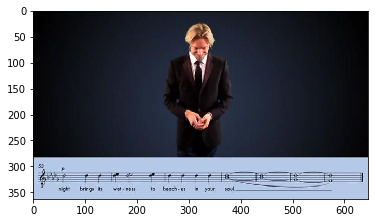

In [4]:
im = Image.open(im_list[0])
plt.imshow(im)

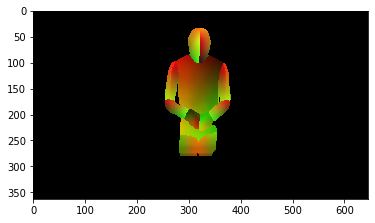

In [5]:
im = Image.open(iuv_list[0])
plt.imshow(im)

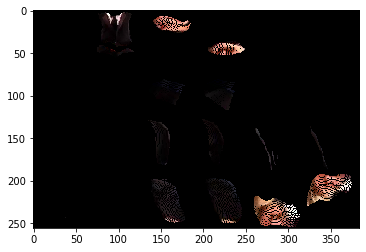

In [6]:
tex, mask = UVConverter.create_texture(im_list[0], iuv_list[0],parts_size=64)
plt.imshow(tex)

## 2. Crerate texture from whole video

In [7]:
tex_im, mask_im = UVConverter.create_texture_from_video(im_list, iuv_list, parts_size=200)

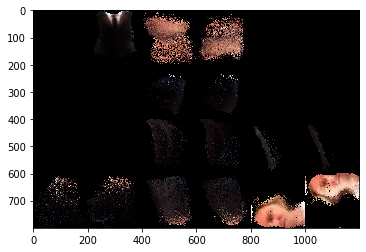

In [8]:
plt.imshow(tex_im)

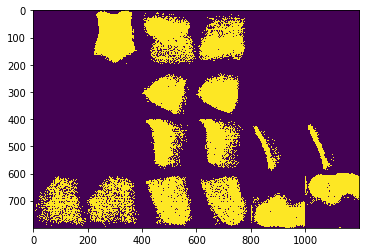

In [9]:
plt.imshow(mask_im)